### Import needed packages to work with MobileNetV2

In [113]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd
import csv

model = MobileNetV2(weights='imagenet')

model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

### Import packaged to work with images on local disk

In [114]:
from tensorflow.keras.preprocessing import image
#from google.colab import files
#from importlib.resources import files
from pathlib import Path

### Describe common variables

In [117]:
img_class = {
    "cat": ["cat", "tabby", "Egyptian_cat", "tiger_cat", "Persian_cat"],
    "ox": ["ox", "bison", "water_buffalo"],
    "dog": ["dog",
            "Chihuahua",
            "malamute",
            "Eskimo_dog",
            "miniature_schnauzer",
            "West_Highland_white_terrier",
            "bull_mastiff", "golden_retriever",
            "Rhodesian_ridgeback",
            "pug",
            "dingo",
            "bull_mastiff",
            "beagle"
           ],
    "elephant": ["Indian_elephant", "tusker", "African_elephant"],
    "fish": ["fish", "rock_beauty", "tiger_shark", "barracouta", "great_white_shark", "goldfish"],
    "pickup": ["pickup", "minivan", "truck", "jeep", "trailer_truck"],
    "fruit": ["lemon", "fruit", "strawberry", "banana", "orange", "fig", "pineapple"],
    "owl": ["great_grey_owl"],
    "special": ["special", "sports_car", "parachute"],
    "vegetables": ["vegetables", "cucumber", "zucchini", "bell_pepper", "head_cabbage", "broccoli"],
    "wolf": ["wolf", "Eskimo_dog", "coyote", "timber_wolf", "white_wolf"],
    "fox": ["red_fox", "grey_fox", "Arctic_fox"]
}

### Classify original images images

In [116]:
files = Path('images').glob('*')

A = np.array(['image', 'class', 'probability', 'valid'])

for fn in sorted(files):
  print(fn)
  img_path = fn
  img = image.load_img(img_path, target_size=(224, 224))
  img.save("test/" + str(img_path))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
    
  # decode the results into a list of tuples (class, description, probability)
  # (one such list for each sample in the batch)
  print('Predicted:', decode_predictions(preds, top=3)[0])

  # Post processing part to build table of results
  img_name = str(img_path).split('/')[1]
  name =   str(img_name).split('_')[0]
  local_result = bool
  temp_list = []
  for item in decode_predictions(preds, top=1)[0]:
    for key in img_class:
        if name == key:
            #if any(ext in item[1] for ext in img_class[key]):
            if item[1] in img_class[key]:
                local_result = True
            else:
                local_result = False
            temp_list = temp_list + [img_name,item[1],item[2],local_result]
            A = np.vstack([A, temp_list])
            temp_list = []
            
print("Classification completed")

images/cat_1.jpg
1/1 [==============================] - 0s 317ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.6747729), ('n02127052', 'lynx', 0.075518675), ('n02123045', 'tabby', 0.030962624)]
images/cat_10.jpg
1/1 [==============================] - 0s 21ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.3897537), ('n02109961', 'Eskimo_dog', 0.1626919), ('n02123045', 'tabby', 0.038739778)]
images/cat_2.jpg
1/1 [==============================] - 0s 20ms/step
Predicted: [('n02123159', 'tiger_cat', 0.34920886), ('n02123394', 'Persian_cat', 0.18880995), ('n02123045', 'tabby', 0.14120647)]
images/cat_3.jpg
1/1 [==============================] - 0s 20ms/step
Predicted: [('n02123159', 'tiger_cat', 0.36997104), ('n02124075', 'Egyptian_cat', 0.14498627), ('n02123045', 'tabby', 0.096502304)]
images/cat_4.jpg
1/1 [==============================] - 0s 21ms/step
Predicted: [('n02123045', 'tabby', 0.6677591), ('n02123159', 'tiger_cat', 0.21430443), ('n02127052', 'lynx', 0.0118674915)]
images/ca

### Save gotten numpy table to csv file for investigation

In [118]:
print(A)
df = pd.DataFrame(A)
df.to_csv("foo.csv")

print("Saving completed")

[['image' 'class' 'probability' 'valid']
 ['cat_1.jpg' 'Egyptian_cat' '0.6747729' 'True']
 ['cat_10.jpg' 'Egyptian_cat' '0.3897537' 'True']
 ['cat_2.jpg' 'tiger_cat' '0.34920886' 'True']
 ['cat_3.jpg' 'tiger_cat' '0.36997104' 'True']
 ['cat_4.jpg' 'tabby' '0.6677591' 'True']
 ['cat_5.jpg' 'tiger_cat' '0.32577714' 'True']
 ['cat_6.jpg' 'tiger_cat' '0.6586821' 'True']
 ['cat_7.jpg' 'Egyptian_cat' '0.565569' 'True']
 ['cat_8.jpg' 'tiger_cat' '0.53311384' 'True']
 ['cat_9.jpg' 'Persian_cat' '0.4380358' 'True']
 ['dog_1.jpg' 'miniature_schnauzer' '0.40865818' 'True']
 ['dog_10.jpg' 'Chihuahua' '0.7883024' 'True']
 ['dog_2.jpg' 'West_Highland_white_terrier' '0.92689383' 'True']
 ['dog_3.jpg' 'bull_mastiff' '0.7268091' 'True']
 ['dog_4.jpg' 'golden_retriever' '0.91444635' 'True']
 ['dog_5.jpg' 'pug' '0.95875746' 'True']
 ['dog_6.jpg' 'dingo' '0.6696596' 'True']
 ['dog_7.jpg' 'Eskimo_dog' '0.30982688' 'True']
 ['dog_8.jpg' 'bull_mastiff' '0.29334047' 'True']
 ['dog_9.jpg' 'beagle' '0.76071835'

### Import packages for calculation of image quality and plotting

In [119]:
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

from scipy.interpolate import interp1d
from itertools import cycle

import os
import math

### Calculate PSNR metrics

30 and 50 dB is fine for most cases

In [120]:
files = Path('images').glob('*')

PSNR_array = np.array(['image_name',
                'qf_96', 'qf_91','qf_86', 'qf_81','qf_76',
                'qf_71', 'qf_66', 'qf_61', 'qf_56', 'qf_51',
                'qf_46', 'qf_41', 'qf_36', 'qf_31', 'qf_26',
                'qf_21', 'qf_16', 'qf_11', 'qf_6', 'qf_1'
              ])

PSNR_array = np.vstack([PSNR_array, ['QF', 96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16, 11, 6, 1]])

etalon_folder = "images"
compressed_folder = "compressed/images"

for fn in sorted(files):
    img_name = str(fn).split('/')[1]
    etalon_image = etalon_folder + '/' + str(fn).split('/')[1]
    print(etalon_image)
    temp_list = [img_name]

    for x in range(96, 0, -5):
        compressed_image = compressed_folder + '_' + str(x) + '/' + str(fn).split('/')[1]
        print(compressed_image)
        input_image = cv2.imread(etalon_image)
        
        # Check if the input image was successfully loaded
        # if input_image is not None:
        output_image = cv2.imread(compressed_image)
    
        # Calculate the PSNR
        psnr = cv2.PSNR(input_image, output_image)
        temp_list.append(round(psnr, 2))
        
        #print(f'PSNR: {psnr:.2f} dB')
    print(temp_list)
    PSNR_array = np.vstack([PSNR_array, temp_list])
    temp_list = []
    
print("Calculation completed")

images/cat_1.jpg
compressed/images_96/cat_1.jpg
PSNR: 50.20 dB
compressed/images_91/cat_1.jpg
PSNR: 48.83 dB
compressed/images_86/cat_1.jpg
PSNR: 46.91 dB
compressed/images_81/cat_1.jpg
PSNR: 45.51 dB
compressed/images_76/cat_1.jpg
PSNR: 44.84 dB
compressed/images_71/cat_1.jpg
PSNR: 44.19 dB
compressed/images_66/cat_1.jpg
PSNR: 43.15 dB
compressed/images_61/cat_1.jpg
PSNR: 42.83 dB
compressed/images_56/cat_1.jpg
PSNR: 42.26 dB
compressed/images_51/cat_1.jpg
PSNR: 41.90 dB
compressed/images_46/cat_1.jpg
PSNR: 41.48 dB
compressed/images_41/cat_1.jpg
PSNR: 41.08 dB
compressed/images_36/cat_1.jpg
PSNR: 40.59 dB
compressed/images_31/cat_1.jpg
PSNR: 39.80 dB
compressed/images_26/cat_1.jpg
PSNR: 38.59 dB
compressed/images_21/cat_1.jpg
PSNR: 37.49 dB
compressed/images_16/cat_1.jpg
PSNR: 35.73 dB
compressed/images_11/cat_1.jpg
PSNR: 33.46 dB
compressed/images_6/cat_1.jpg
PSNR: 29.30 dB
compressed/images_1/cat_1.jpg
PSNR: 25.01 dB
['cat_1.jpg', 50.2, 48.83, 46.91, 45.51, 44.84, 44.19, 43.15, 42.

### Plot PSNR results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


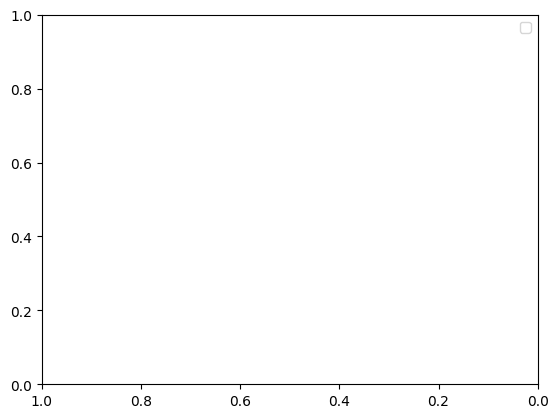

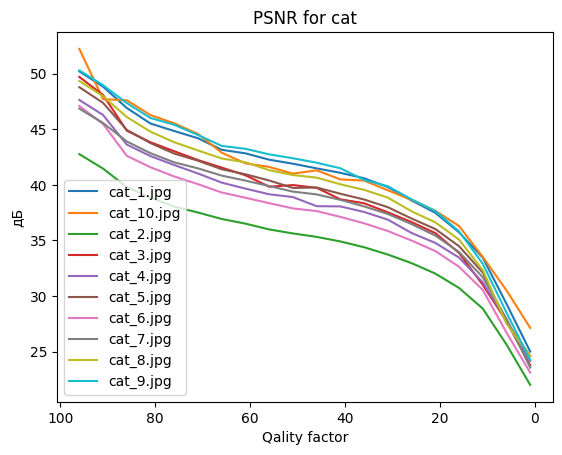

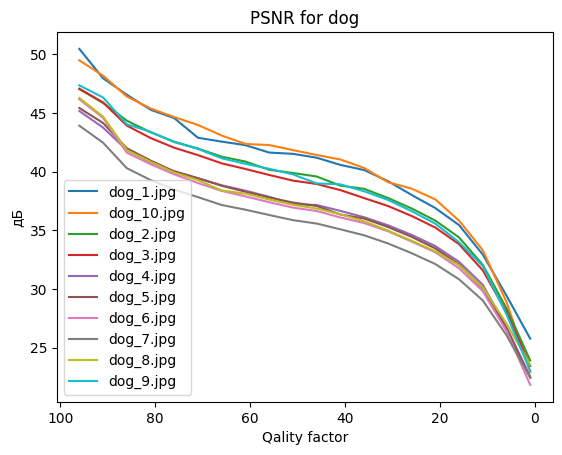

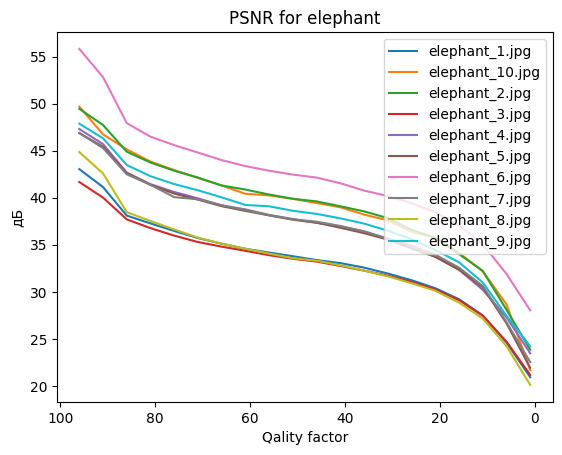

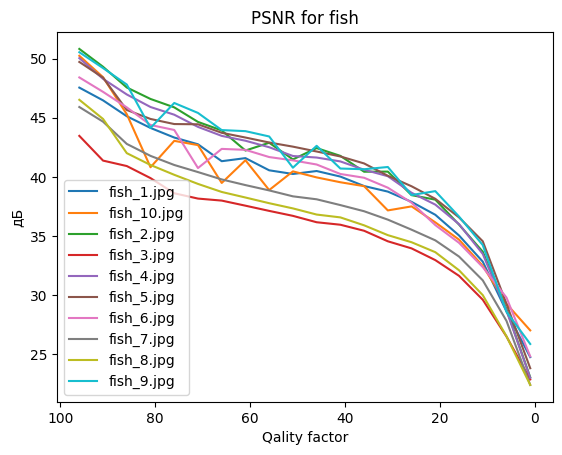

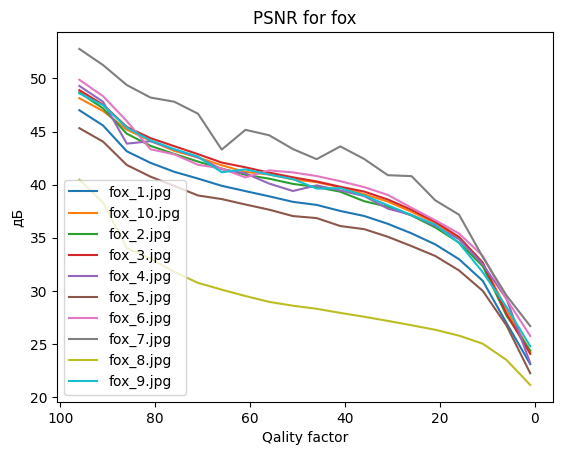

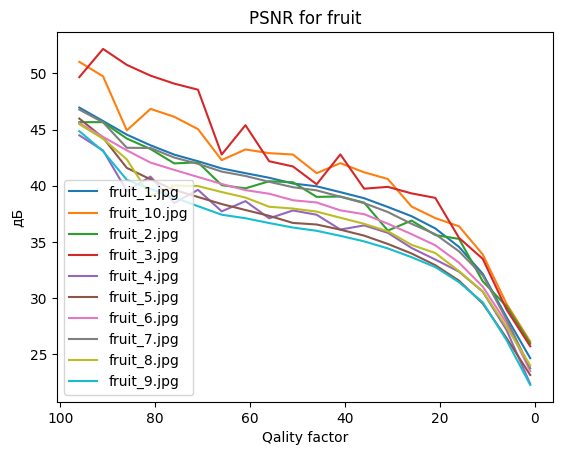

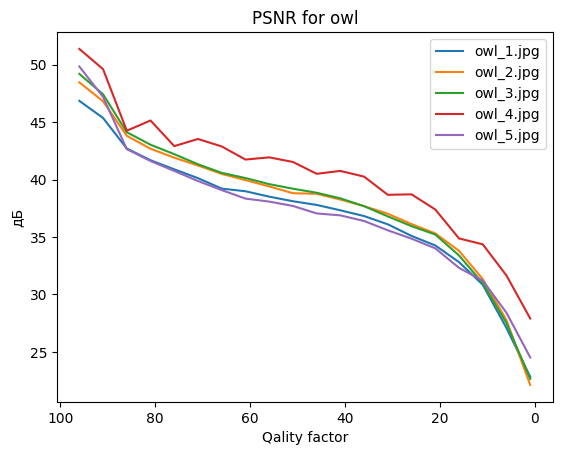

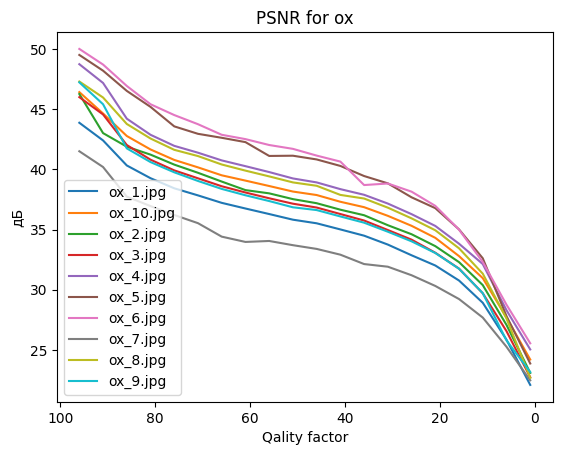

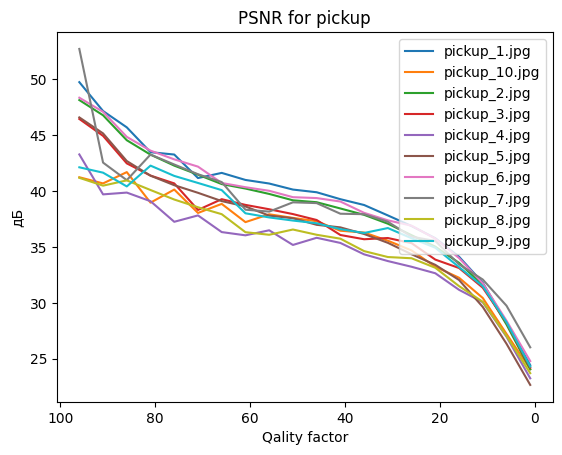

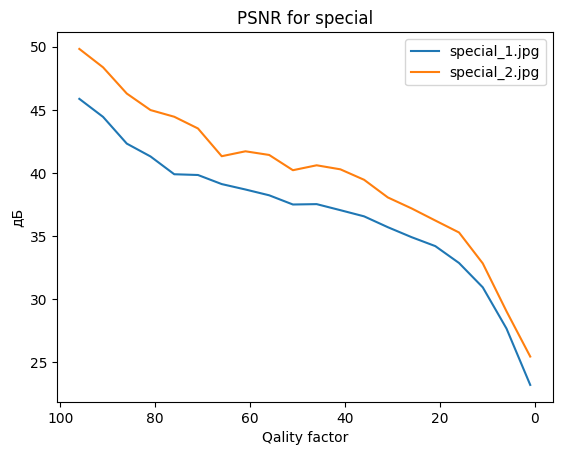

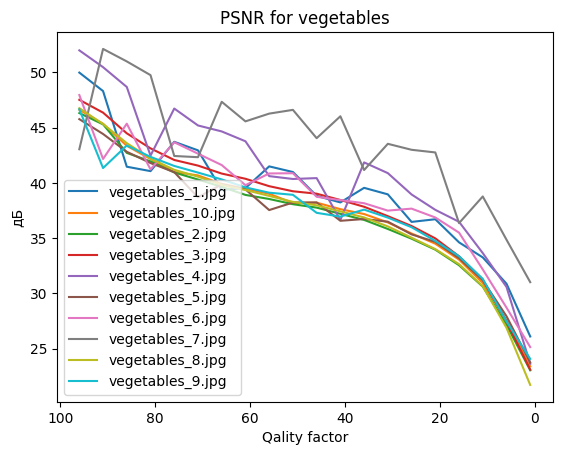

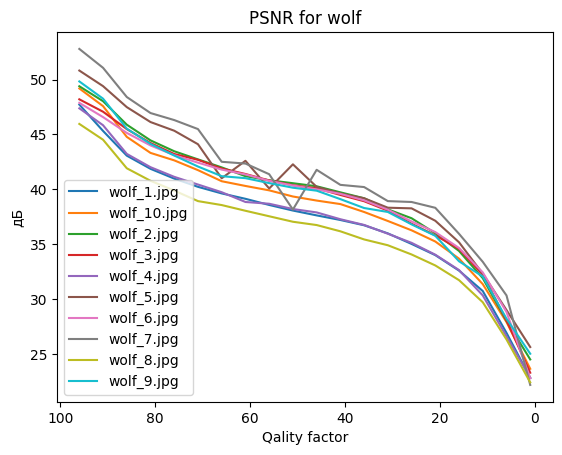

In [121]:
qf_label = PSNR_array[0, 1]
image_label = PSNR_array[2, 0]
class_list = []

for i in range(2, len(PSNR_array[2:, 0])+2):
    image_label = PSNR_array[i, 0]
    if image_label.split('_')[0] not in class_list:
        class_list.append(image_label.split('_')[0])

        plt.gca().invert_xaxis()
        plt.legend()
        plt.show()

        # first image
        x = PSNR_array[1, 1:].astype(float)
        y = PSNR_array[i, 1:].astype(float)
        
        plt.title(f"PSNR for {image_label.split('_')[0]}") 
        plt.xlabel("Qality factor")
        plt.ylabel("дБ") 
        plt.plot(x,y, label = image_label)
    elif image_label.split('_')[0] in class_list:
        x = PSNR_array[1, 1:].astype(float)
        y = PSNR_array[i, 1:].astype(float)
        
        plt.title(f"PSNR for {image_label.split('_')[0]}") 
        plt.xlabel("Qality factor")
        plt.ylabel("дБ") 
        plt.plot(x,y, label = image_label)
    
# Last group of graphs        
plt.gca().invert_xaxis()
plt.legend()
plt.show()

### Calculate SSIM metric.

Нормальним вважаються значення близькі до 1. Абсолютно різними до 0. При цьому якщо результати рівні -1 - картинки подібні але інвертовані. 

In [123]:
files = Path('images').glob('*')

SSIM_array = np.array(['image_name',
                'qf_96', 'qf_91','qf_86', 'qf_81','qf_76',
                'qf_71', 'qf_66', 'qf_61', 'qf_56', 'qf_51',
                'qf_46', 'qf_41', 'qf_36', 'qf_31', 'qf_26',
                'qf_21', 'qf_16', 'qf_11', 'qf_6', 'qf_1'
              ])

SSIM_array = np.vstack([SSIM_array, ['QF', 96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16, 11, 6, 1]])

etalon_folder = "images"
compressed_folder = "compressed/images"

for fn in sorted(files):
    img_name = str(fn).split('/')[1]
    etalon_image = etalon_folder + '/' + str(fn).split('/')[1]
    print(etalon_image)
    temp_list = [img_name]

    for x in range(96, 0, -5):
        compressed_image = compressed_folder + '_' + str(x) + '/' + str(fn).split('/')[1]
        #print(compressed_image)
        
        # Check if the input image was successfully loaded
        # if input_image is not None:
        output_image = cv2.imread(compressed_image)
    
        # Calculate the SSIM
        before = cv2.imread(etalon_image)
        after = cv2.imread(compressed_image)

        # Convert images to grayscale
        before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
        after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
        
        # Compute SSIM between two images
        (score, diff) = structural_similarity(before_gray, after_gray, full=True)
        #print("Image similarity", score)
        temp_list.append(round(score, 4))
        
    print(temp_list)
    SSIM_array = np.vstack([SSIM_array, temp_list])
    temp_list = []
    
#print(SSIM_array)  
print("Calculation completed")

images/cat_1.jpg
['cat_1.jpg', 0.9988, 0.998, 0.9955, 0.9932, 0.9912, 0.9899, 0.9881, 0.9867, 0.9849, 0.9833, 0.9818, 0.9796, 0.9765, 0.9727, 0.9668, 0.9584, 0.9437, 0.915, 0.8546, 0.763]
images/cat_10.jpg
['cat_10.jpg', 0.9991, 0.9983, 0.9954, 0.9932, 0.9911, 0.9896, 0.9878, 0.9864, 0.9848, 0.9829, 0.9817, 0.9793, 0.9768, 0.9729, 0.9681, 0.961, 0.949, 0.9274, 0.8862, 0.8474]
images/cat_2.jpg
['cat_2.jpg', 0.9985, 0.9974, 0.9929, 0.9892, 0.9857, 0.9834, 0.9805, 0.9779, 0.9751, 0.9723, 0.9702, 0.9664, 0.9621, 0.9556, 0.9472, 0.9344, 0.9136, 0.8733, 0.7761, 0.5975]
images/cat_3.jpg
['cat_3.jpg', 0.999, 0.9982, 0.9944, 0.9922, 0.9901, 0.9884, 0.9864, 0.9845, 0.9826, 0.9806, 0.9793, 0.9772, 0.9736, 0.97, 0.9647, 0.9569, 0.9422, 0.9216, 0.8686, 0.7892]
images/cat_4.jpg
['cat_4.jpg', 0.9988, 0.9979, 0.9944, 0.992, 0.9899, 0.9882, 0.9861, 0.9845, 0.9824, 0.9805, 0.9789, 0.9763, 0.9733, 0.9689, 0.9626, 0.9535, 0.9388, 0.9126, 0.844, 0.7447]
images/cat_5.jpg
['cat_5.jpg', 0.9985, 0.9974, 0.9933

### Plot SSIM results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


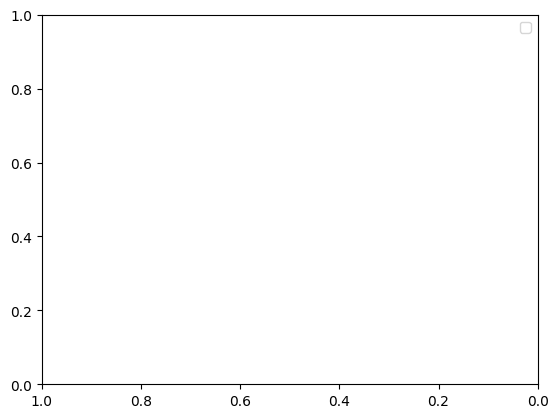

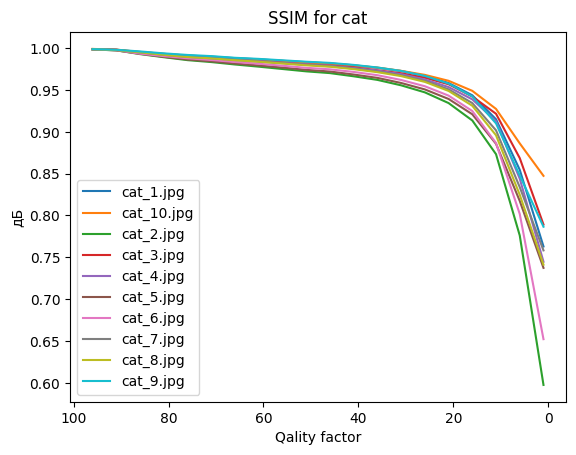

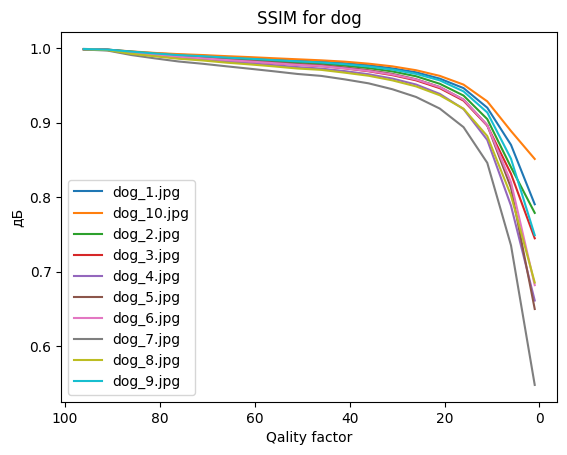

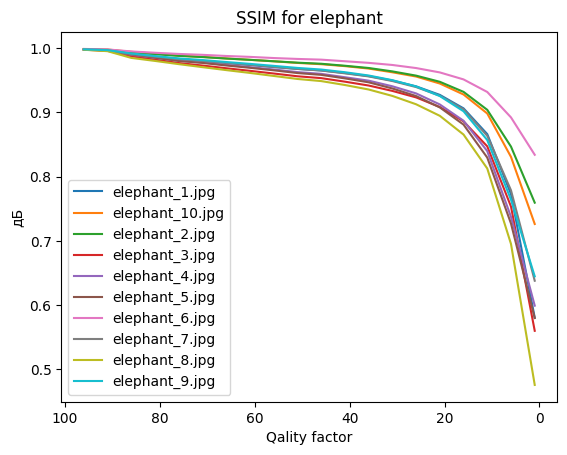

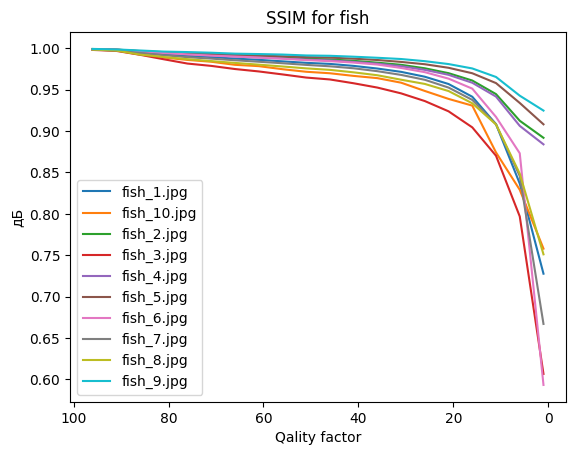

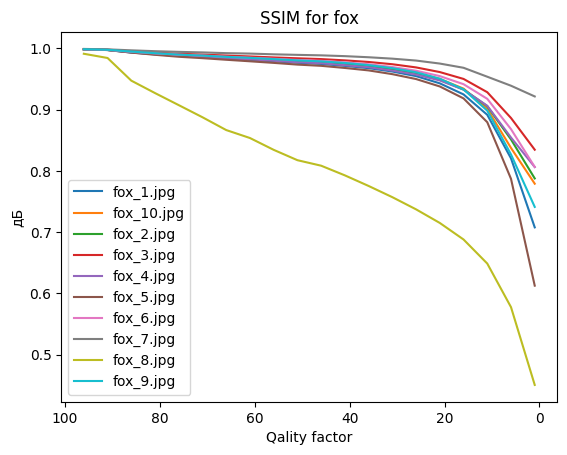

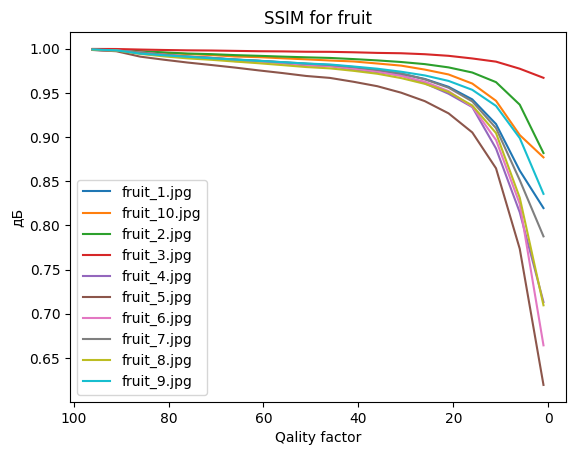

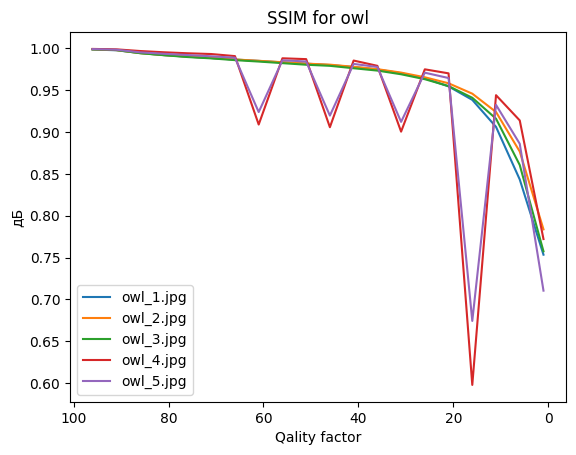

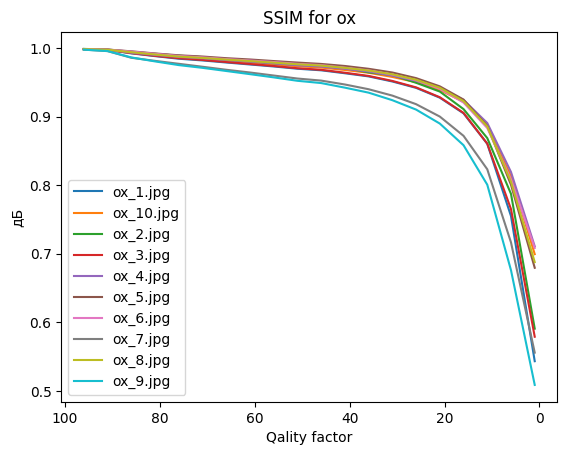

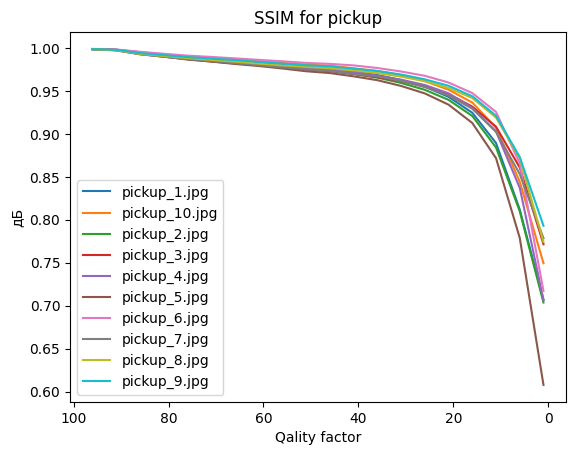

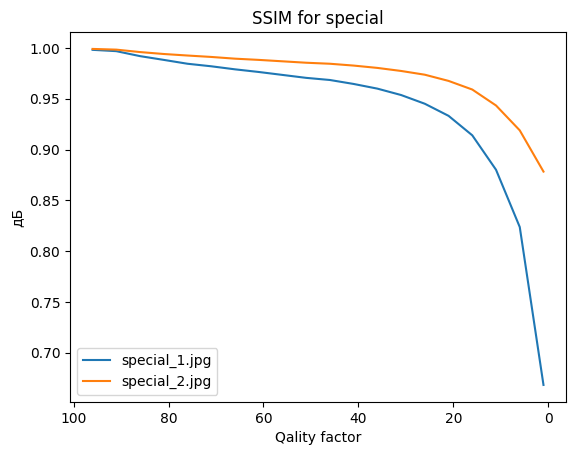

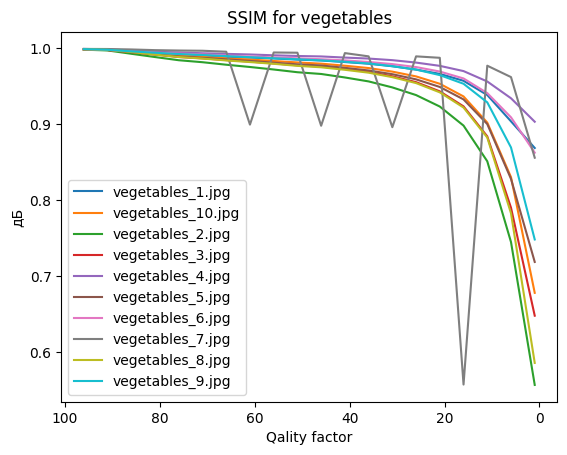

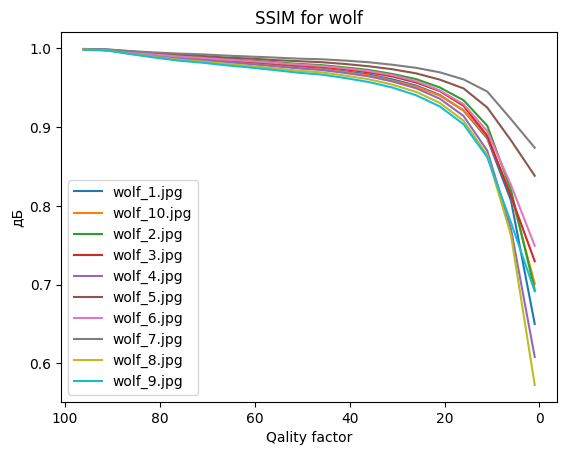

In [125]:
qf_label = SSIM_array[0, 1]
image_label = SSIM_array[2, 0]
class_list = []

for i in range(2, len(SSIM_array[2:, 0])+2):
    image_label = SSIM_array[i, 0]
    if image_label.split('_')[0] not in class_list:
        class_list.append(image_label.split('_')[0])

        plt.gca().invert_xaxis()
        plt.legend()
        plt.show()

        # first image
        x = SSIM_array[1, 1:].astype(float)
        y = SSIM_array[i, 1:].astype(float)
        
        plt.title(f"SSIM for {image_label.split('_')[0]}") 
        plt.xlabel("Qality factor")
        plt.ylabel("дБ") 
        plt.plot(x,y, label = image_label)
    elif image_label.split('_')[0] in class_list:
        x = SSIM_array[1, 1:].astype(float)
        y = SSIM_array[i, 1:].astype(float)
        
        plt.title(f"SSIM for {image_label.split('_')[0]}") 
        plt.xlabel("Qality factor")
        plt.ylabel("дБ") 
        plt.plot(x,y, label = image_label)
    
# Last group of graphs        
plt.gca().invert_xaxis()
plt.legend()
plt.show()

### Classification accuracy

On this step we will find classification accuracy for our NN depending on image QF. In the same time if classification is completely different from original we will put 0 to classification accuracy"

In [124]:
files = Path('images').glob('*')

A = np.array(['image', 'class', 'probability', 'valid'])

NET_array = np.array(['image_name',
                'qf_96', 'qf_91','qf_86', 'qf_81','qf_76',
                'qf_71', 'qf_66', 'qf_61', 'qf_56', 'qf_51',
                'qf_46', 'qf_41', 'qf_36', 'qf_31', 'qf_26',
                'qf_21', 'qf_16', 'qf_11', 'qf_6', 'qf_1'
              ])

NET_array = np.vstack([NET_array, ['QF', 96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16, 11, 6, 1]])

etalon_folder = "images"
compressed_folder = "compressed/images"

for fn in sorted(files):
    img_name = str(fn).split('/')[1]
    image_path = etalon_folder + '/' + str(fn).split('/')[1]
    temp_list = [img_name]
    temp_list_2 = ['']
    
    for x in range(96, 0, -5):
        compressed_image = compressed_folder + '_' + str(x) + '/' + str(fn).split('/')[1]
        
        img_path = compressed_image
        img = image.load_img(img_path, target_size=(224, 224))
        img.save("test/" + str(img_path))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        print(img_path)
        preds = model.predict(x)
        # decode the results into a list of tuples (class, description, probability)
          # (one such list for each sample in the batch)
        #print('Predicted:', decode_predictions(preds, top=3)[0])
    
        # Post processing part to build table of results
        img_name = str(img_path).split('/')[2]
        
        name =   str(img_name).split('_')[0]
        local_result = bool
        for item in decode_predictions(preds, top=1)[0]:
            for key in img_class:
                 if name == key:
                     if any(ext in item[1] for ext in img_class[key]):
                         local_result = True
                         #print(item[2])
                         #temp_list.append(round(item[2], 1))
                         temp_list.append(math.floor(item[2] * 100)/100.0)
                         temp_list_2.append(item[1])
                     else:
                         local_result = False
                         temp_list.append(0.1)
                         temp_list_2.append(item[1])
    print(temp_list)
    NET_array = np.vstack([NET_array, temp_list])
    #NET_array = np.vstack([NET_array, temp_list_2])
    temp_list = []
    temp_list_2 = []
    
print("Classification completed")

compressed/images_96/cat_1.jpg
1/1 [==============================] - 0s 39ms/step
compressed/images_91/cat_1.jpg
1/1 [==============================] - 0s 21ms/step
compressed/images_86/cat_1.jpg
1/1 [==============================] - 0s 25ms/step
compressed/images_81/cat_1.jpg
1/1 [==============================] - 0s 22ms/step
compressed/images_76/cat_1.jpg
1/1 [==============================] - 0s 20ms/step
compressed/images_71/cat_1.jpg
1/1 [==============================] - 0s 21ms/step
compressed/images_66/cat_1.jpg
1/1 [==============================] - 0s 48ms/step
compressed/images_61/cat_1.jpg
1/1 [==============================] - 0s 23ms/step
compressed/images_56/cat_1.jpg
1/1 [==============================] - 0s 23ms/step
compressed/images_51/cat_1.jpg
1/1 [==============================] - 0s 22ms/step
compressed/images_46/cat_1.jpg
1/1 [==============================] - 0s 20ms/step
compressed/images_41/cat_1.jpg
1/1 [==============================] - 0s 19ms/step
comp

### Save gotten numpy table to csv file for investigation

In [ ]:
print(NET_array)
df = pd.DataFrame(NET_array)
df.to_csv("foo2.csv")

### Plot classification results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


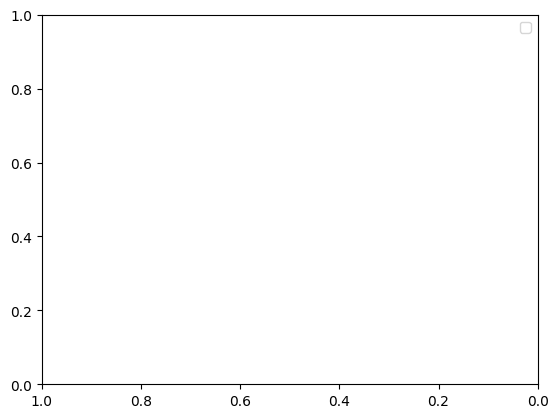

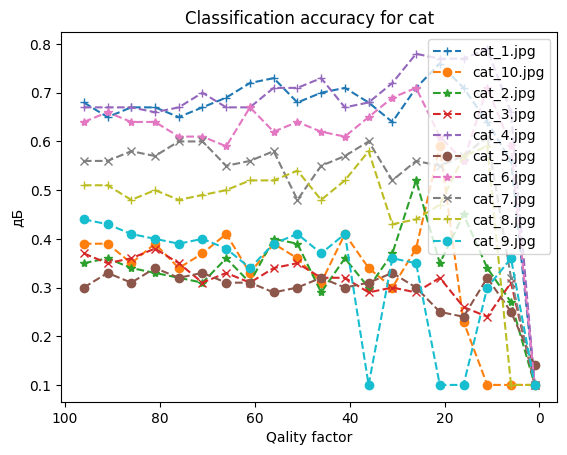

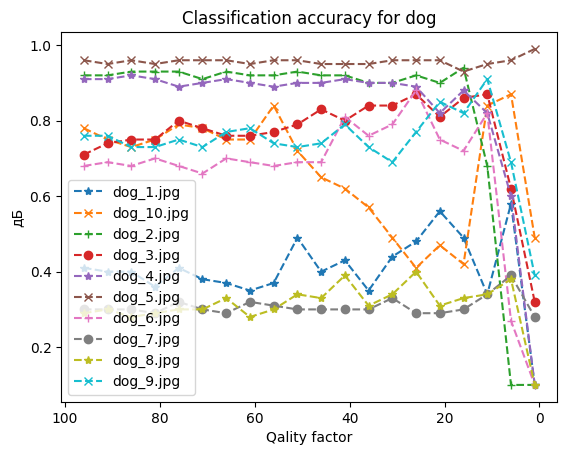

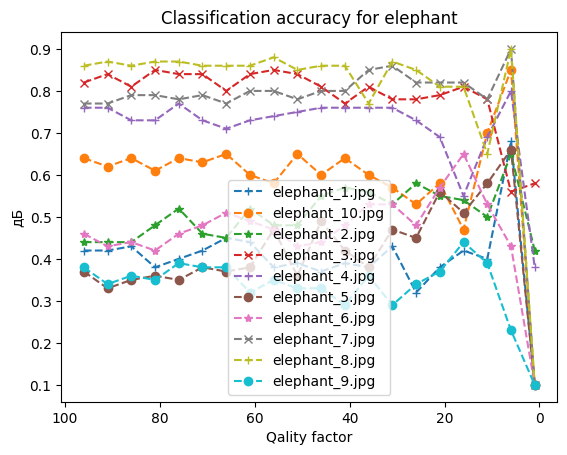

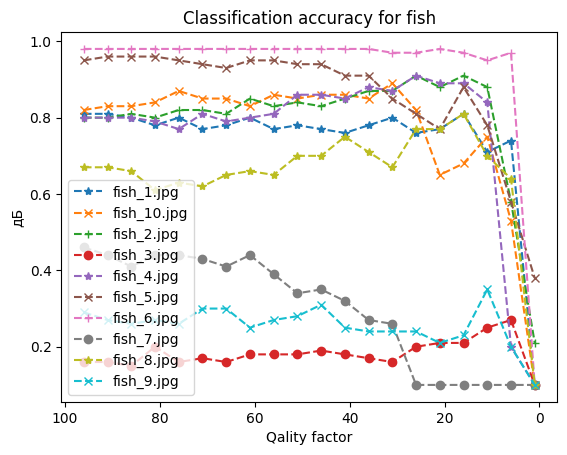

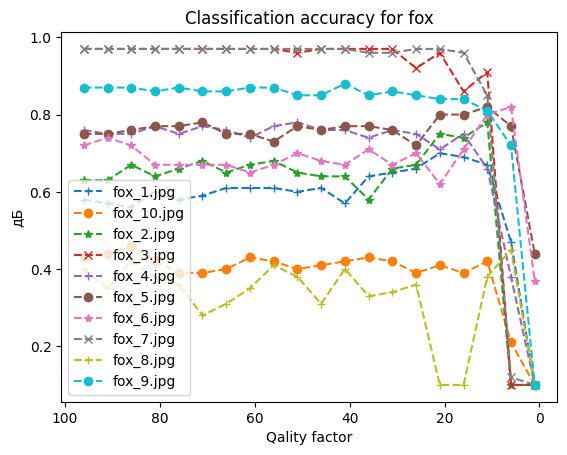

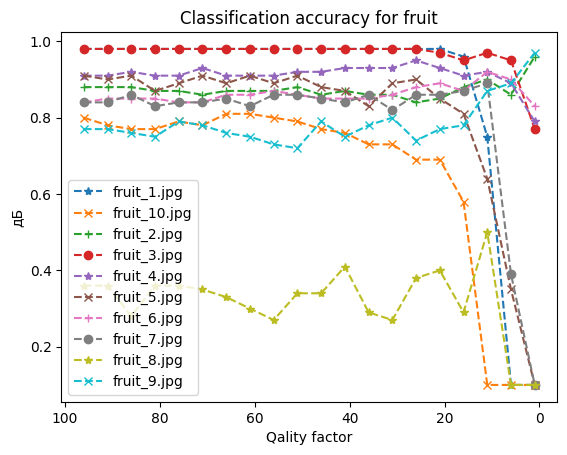

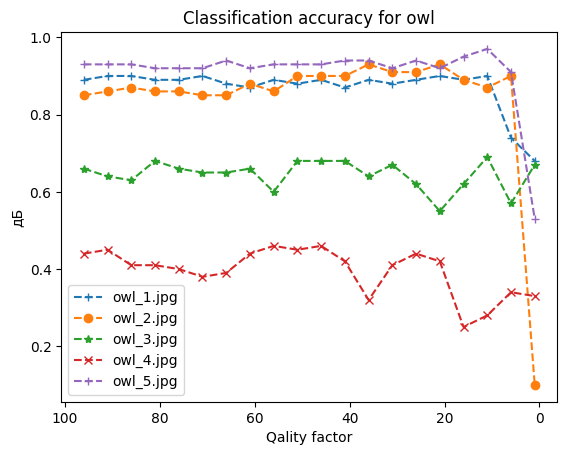

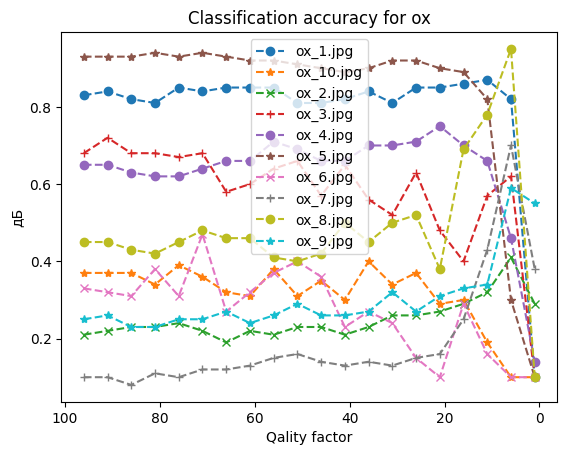

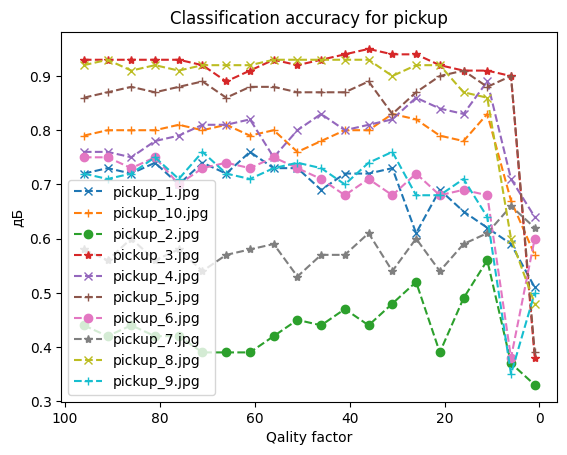

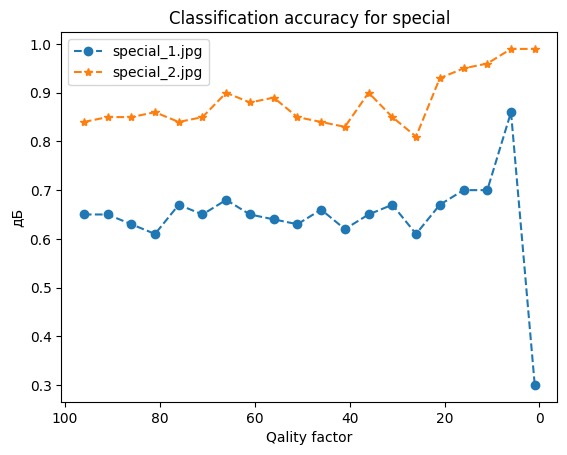

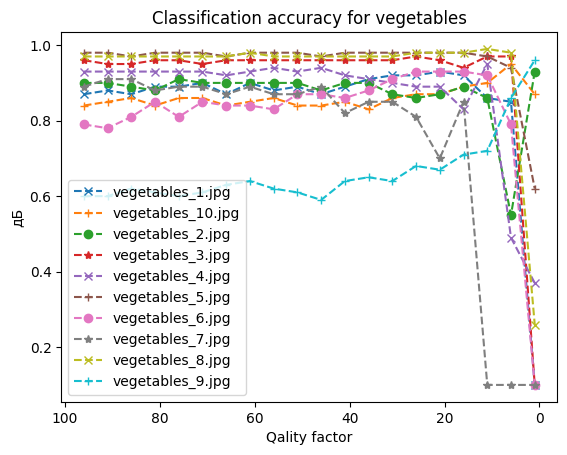

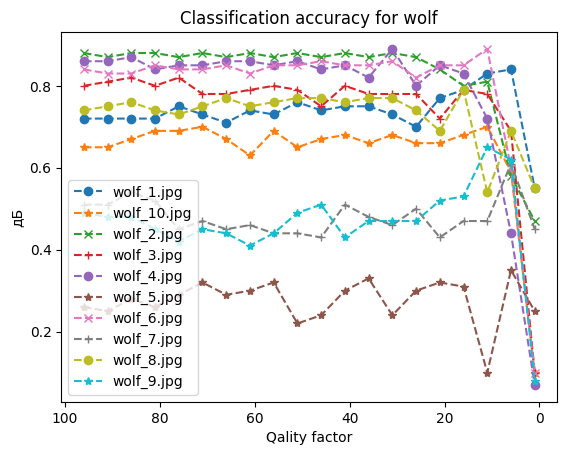

In [126]:
qf_label = NET_array[0, 1]
image_label = NET_array[2, 0]
class_list = []

markers_list = ['+', 'o', '*', 'x']

markers_loop = cycle(markers_list)

for i in range(2, len(NET_array[2:, 0])+2):
    image_label = NET_array[i, 0]
    if image_label.split('_')[0] not in class_list:
        class_list.append(image_label.split('_')[0])

        plt.gca().invert_xaxis()
        plt.legend()
        plt.show()

        # first image
        x = NET_array[1, 1:].astype(float)
        y = NET_array[i, 1:].astype(float)

        cubic_interpolation_model = interp1d(x, y, kind = "cubic")
 
        # Plotting the Graph
        X_=np.linspace(x.min(), x.max(), 20)
        Y_=cubic_interpolation_model(X_)
        
        plt.title(f"Classification accuracy for {image_label.split('_')[0]}") 
        plt.xlabel("Qality factor")
        plt.ylabel("Probability") 
        #plt.plot(X_,Y_, 'x', linestyle = '--', label = image_label)
        plt.plot(x,y, marker = next(markers_loop), linestyle = '--', label = image_label)
    elif image_label.split('_')[0] in class_list:
        x = NET_array[1, 1:].astype(float)
        y = NET_array[i, 1:].astype(float)

        cubic_interpolation_model = interp1d(x, y, kind = "cubic")
 
        # Plotting the Graph
        X_=np.linspace(x.min(), x.max(), 20)
        Y_=cubic_interpolation_model(X_)
        
        plt.title(f"Classification accuracy for {image_label.split('_')[0]}") 
        plt.xlabel("Qality factor")
        plt.ylabel("дБ") 
        #plt.plot(X_,Y_, 'x', linestyle = '--', label = image_label)
        plt.plot(x,y, marker = next(markers_loop), linestyle = '--', label = image_label)
    
# Last group of graphs        
plt.gca().invert_xaxis()
plt.legend()
plt.show()